## Load the Data and Visualize it
Global warming occurs when carbon dioxide (CO2) and other air pollutants and greenhouse gases collect in the atmosphere and absorb sunlight and solar radiation that have bounced off the earth’s surface. 

The data website is [here](https://datahub.io/core/co2-fossil-global), which is the global co2 emissions from fossil fuels since 1751

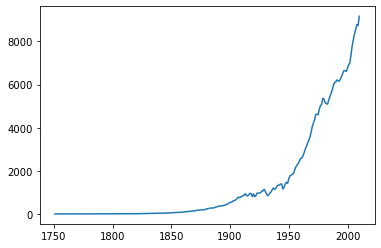

In [2]:
import matplotlib.pyplot as plt
import numpy as np

co2_data = np.genfromtxt('global_csv.txt', delimiter=',', names=True, case_sensitive=True)
total = co2_data['Total']
year = co2_data['Year']
plt.plot(year,total)
plt.show()

## A regression example

Use data after 1960 to do a simple linear regression

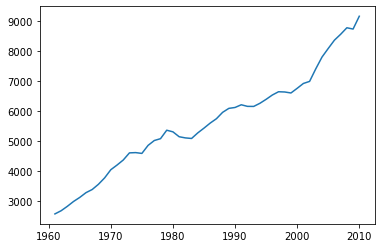

In [3]:
co2_late = co2_data[co2_data['Year']>1960]
total_late = co2_late['Total']
year_late = co2_late['Year']
plt.plot(year_late,total_late)
plt.show()

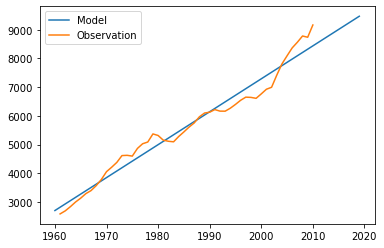

In [4]:
from sklearn.linear_model import Ridge

mymodel = Ridge(alpha=0.1)
X_input = year.reshape(len(year),1)
y_target = total.reshape(len(year),1)
mymodel.fit(X_input,y_target)
x_line = np.arange(1960,2020)
x_line = x_line.reshape(len(x_line),1)
y_model = mymodel.predict(x_line)
plt.plot(x_line,y_model,label = 'Model')
plt.plot(year,total,label = 'Observation')
plt.legend()
plt.show()

Find a model to describe the data from 1750 till now.

model: log(y)=-60.351226395984064+0.03480651349332456*x


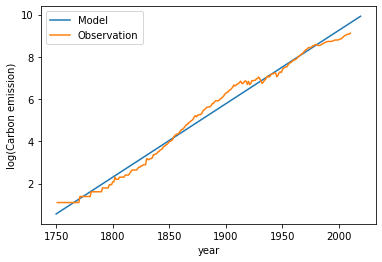

In [5]:
# Solution 1: np.log
co2_use = co2_data[co2_data['Year']>1750]
year = co2_use['Year']
total = co2_use['Total']
mymodel = Ridge(alpha=0.1)
X_input = year
X_input = X_input.reshape(len(year),1)
y_target = np.log(total)  ##Calculate log of the emission
y_target = y_target.reshape(len(year),1)
mymodel.fit(X_input,y_target) ##linear fit between log(emission) and year
print(f"model: log(y)={mymodel.intercept_[0]}+{mymodel.coef_[0,0]}*x")
x_line = np.arange(1750, 2020)
x_line = x_line.reshape(len(x_line),1)
y_predict = mymodel.predict(x_line) ##predict log(emission)
plt.plot(x_line,y_predict,label = 'Model')
plt.plot(year,np.log(total),label = 'Observation')
plt.xlabel("year")
plt.ylabel("log(Carbon emission)")
plt.legend()
plt.show()

model: y = 0.24*x^2+-893.87*x^1+818207.54*x^0


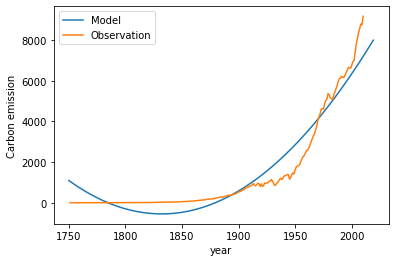

In [6]:
########################
# Solution 2: polynomial
def addpoly(x, n):
    """
    @x: array of training samples
    @n: order of the input  
    @return: array of X 
    """

    x_vec = np.zeros((len(x), n + 1))
    for i in range(n + 1):
        x_vec[:, i] = x**i
    return x_vec
def outexpression(theta):
    """
    @theta: The theta hat values,remember that theta is a matrix
    #return: output an expression of the theta
    """
    theta_array = np.array(theta).squeeze()

    expression = 'y = '
    for i in range(len(theta_array) - 1, -1, -1):
        expression_new = "{:.2f}" + "*x^" + "{:.0f}"

        expression += expression_new.format(theta_array[i], i)
        if i != 0:
            expression += '+'
    return expression

co2_use = co2_data[co2_data['Year']>1750]
year = co2_use['Year']
total = co2_use['Total']
mymodel = Ridge(alpha=0.1)
X_input = addpoly(year,2)
y_target = total.reshape(len(year),1)
mymodel.fit(X_input,y_target)
theta=np.array([[mymodel.intercept_[0]],[mymodel.coef_[0,1]],[mymodel.coef_[0,2]]])
print(f"model: {outexpression(theta)}")
x_line = np.arange(1750, 2020)
y_predict = mymodel.predict(addpoly(x_line,2))
x_line = x_line.reshape(len(x_line),1)
plt.plot(x_line,y_predict,label = 'Model')
plt.plot(year,total,label = 'Observation')
plt.xlabel("year")
plt.ylabel("Carbon emission")
plt.legend()
plt.show()